In [1]:
from tdavec import createEllipse, TDAvectorizer, tdavec_core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Hello from tdavec


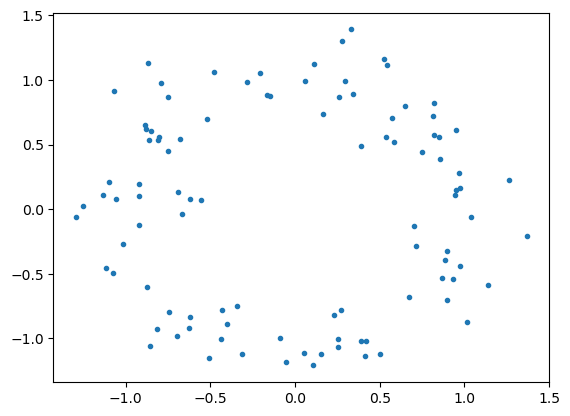

In [2]:
X = pd.read_csv("../tdavec/unitCircle.csv", skiprows=1).to_numpy()
plt.plot(X[:,0], X[:,1], ".")
plt.show()

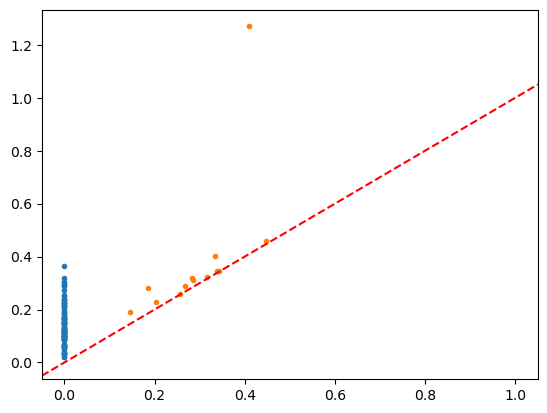

In [3]:
v = TDAvectorizer()
v.fit([X])
PD = v.diags[0]
plt.plot(PD[0][:,0], PD[0][:,1], ".")
plt.plot(PD[1][:,0], PD[1][:,1], ".")
plt.axline((0,0), (1,1), color="r",linestyle="dashed")

In [9]:
v.setParams({"output":"poly"})

v.transform(homDim=0)

array([[[  0.       , -14.1717654]]])

In [9]:
D = v.diags[0]

In [10]:
tdavec_core.computeComplexPolynomial(D, 1)

TypeError: Argument 'D' has incorrect type (expected numpy.ndarray, got list)

In [ ]:
D

In [5]:
D = v.diags[0]

In [9]:
python = tdavec_core.compute_stats(D, 1)
R = [0.293132394867891, 0.0850074464279819, 0.284394883135768, 0.0960806397014151, 0.299475758370877, 0.177939739281458, 0.243058614290154, 0.339139253991569, 0.416317366530457, 0.385940496272333, 0.274479552229507, 0.318265198439214, 0.0858363430062821, 1.08001988780266, 0.219598212239333, 0.274776307571496, 0.360612650577778, 0.621524153485136, 0.339536445570112, 0.166753538148609, 0.300849142069845, 0.0989110953405682, 0.671168066985808, 0.205614756755523, 0.251229324745392, 0.35014042008596, 0.530068613668374, 0.0928081014044422, 0.232171512335849, 0.0243028776000064, 0.0419179560542314, 0.858642745724079, 0.00454985253744056, 0.00704404031930657, 0.048961996373538, 0.247699551273886, 13, 1.7286342654852]

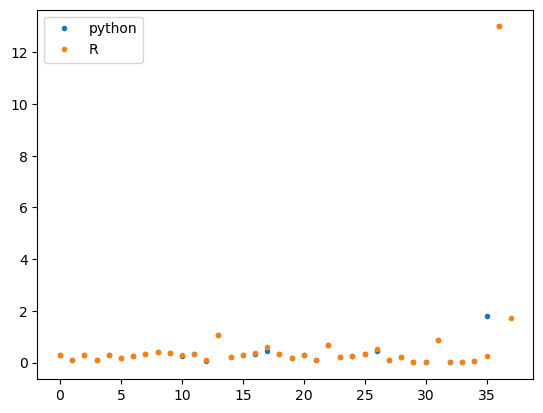

In [13]:
plt.plot(python, ".", label = "python")
plt.plot(R, ".", label = "R")
plt.legend()
plt.show()

In [17]:
n = 20
python[:n]/np.array(R[:n])

array([1.00000001, 0.96076894, 1.00000002, 0.85106559, 1.        ,
       1.06331089, 1.05507836, 0.99728005, 0.94997164, 1.00000001,
       0.9607689 , 1.        , 0.77878133, 0.99999998, 1.06278517,
       1.02019402, 0.96273075, 0.72059648, 1.00000001, 0.96076891])

## Algebra

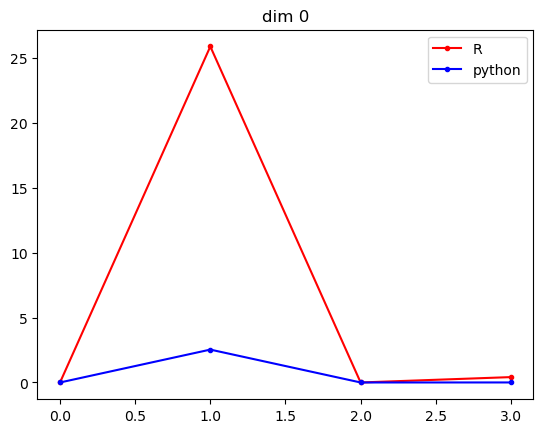

In [5]:
v.setParams({"output":"algebra"})
python = v.transform(homDim=0)[0]
R = np.array([0,25.8803884718878,0,0.414197953470299])
plt.plot(R, "r.-", label = "R")
plt.plot(python, "b.-", label = "python")
plt.title("dim 0")
plt.legend()
plt.show()

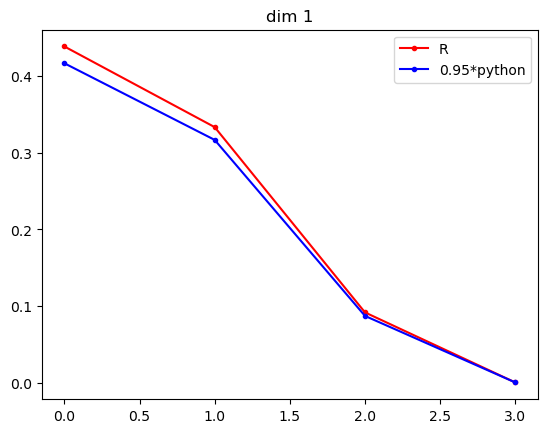

In [6]:
v.setParams({"output":"algebra"})
python = v.transform(homDim=1)[0]
R = np.array([0.438920678383275,0.333573729178711,0.0915972597177655,0.000100476536448101])
plt.plot(R, "r.-", label = "R")
plt.plot(0.95*python, "b.-", label = "0.95*python")
plt.title("dim 1")
plt.legend()
plt.show()

In [7]:
## computeStats

In [ ]:
import numpy as np

In [ ]:
def calc_stats(values: np.ndarray) -> np.ndarray:
    if values.size == 0:
        return np.zeros(9)
    percentiles = np.percentile(values, [0, 10, 25, 50, 75, 90, 100])
    return np.array([
        np.mean(values),
        np.std(values),
        percentiles[3],               # Median
        percentiles[4] - percentiles[2],  # IQR
        percentiles[6] - percentiles[0],  # Range
        percentiles[1],
        percentiles[2],
        percentiles[4],
        percentiles[5],
    ])

def compute_stats(diag, hom_dim: int):
    # Check bounds
    if hom_dim < 0 or hom_dim >= len(diag):
        return None  # or raise an error
    
    data = diag[hom_dim]
    
    if data.size == 0:
        return {
            k: 0.0 for k in (
                ["mean_births", "stddev_births", "median_births", "iqr_births", "range_births",
                 "p10_births", "p25_births", "p75_births", "p90_births"] +
                ["mean_deaths", "stddev_deaths", "median_deaths", "iqr_deaths", "range_deaths",
                 "p10_deaths", "p25_deaths", "p75_deaths", "p90_deaths"] +
                ["mean_midpoints", "stddev_midpoints", "median_midpoints", "iqr_midpoints", "range_midpoints",
                 "p10_midpoints", "p25_midpoints", "p75_midpoints", "p90_midpoints"] +
                ["mean_lifespans", "stddev_lifespans", "median_lifespans", "iqr_lifespans", "range_lifespans",
                 "p10_lifespans", "p25_lifespans", "p75_lifespans", "p90_lifespans"] +
                ["total_bars", "entropy"]
            )
        }

    births = data[:, 0]
    deaths = data[:, 1]

    # Remove non-finite death times
    finite_mask = np.isfinite(deaths)
    births = births[finite_mask]
    deaths = deaths[finite_mask]

    if births.size == 0:
        return compute_stats([np.empty((0, 2)) for _ in diag], hom_dim)  # reuse zero pattern

    midpoints = (births + deaths) / 2
    lifespans = deaths - births
    total_bars = births.size

    entropy = 0.0
    if lifespans.sum() > 0:
        norm_life = lifespans / lifespans.sum()
        entropy = -np.sum(norm_life * np.log2(norm_life))

    stats = {
        "mean_births": calc_stats(births)[0],
        "stddev_births": calc_stats(births)[1],
        "median_births": calc_stats(births)[2],
        "iqr_births": calc_stats(births)[3],
        "range_births": calc_stats(births)[4],
        "p10_births": calc_stats(births)[5],
        "p25_births": calc_stats(births)[6],
        "p75_births": calc_stats(births)[7],
        "p90_births": calc_stats(births)[8],

        "mean_deaths": calc_stats(deaths)[0],
        "stddev_deaths": calc_stats(deaths)[1],
        "median_deaths": calc_stats(deaths)[2],
        "iqr_deaths": calc_stats(deaths)[3],
        "range_deaths": calc_stats(deaths)[4],
        "p10_deaths": calc_stats(deaths)[5],
        "p25_deaths": calc_stats(deaths)[6],
        "p75_deaths": calc_stats(deaths)[7],
        "p90_deaths": calc_stats(deaths)[8],

        "mean_midpoints": calc_stats(midpoints)[0],
        "stddev_midpoints": calc_stats(midpoints)[1],
        "median_midpoints": calc_stats(midpoints)[2],
        "iqr_midpoints": calc_stats(midpoints)[3],
        "range_midpoints": calc_stats(midpoints)[4],
        "p10_midpoints": calc_stats(midpoints)[5],
        "p25_midpoints": calc_stats(midpoints)[6],
        "p75_midpoints": calc_stats(midpoints)[7],
        "p90_midpoints": calc_stats(midpoints)[8],

        "mean_lifespans": calc_stats(lifespans)[0],
        "stddev_lifespans": calc_stats(lifespans)[1],
        "median_lifespans": calc_stats(lifespans)[2],
        "iqr_lifespans": calc_stats(lifespans)[3],
        "range_lifespans": calc_stats(lifespans)[4],
        "p10_lifespans": calc_stats(lifespans)[5],
        "p25_lifespans": calc_stats(lifespans)[6],
        "p75_lifespans": calc_stats(lifespans)[7],
        "p90_lifespans": calc_stats(lifespans)[8],

        "total_bars": total_bars,
        "entropy": entropy
    }

    return stats

In [12]:
D = v.diags[0]

In [13]:
len(D)

2

In [25]:
stats1 = compute_stats(D, 1)

In [26]:
stats1

{'mean_births': np.float64(0.29313239799096036),
 'stddev_births': np.float64(0.08167251377235753),
 'median_births': np.float64(0.28439489006996155),
 'iqr_births': np.float64(0.08177092671394348),
 'range_births': np.float64(0.299475759267807),
 'p10_births': np.float64(0.1892052620649338),
 'p25_births': np.float64(0.25644588470458984),
 'p75_births': np.float64(0.3382168114185333),
 'p90_births': np.float64(0.39548969268798834),
 'mean_deaths': np.float64(0.3859404990306267),
 'stddev_deaths': np.float64(0.2637114162942154),
 'median_deaths': np.float64(0.3182651996612549),
 'iqr_deaths': np.float64(0.06684774160385132),
 'range_deaths': np.float64(1.080019861459732),
 'p10_deaths': np.float64(0.23338572382926942),
 'p25_deaths': np.float64(0.28032514452934265),
 'p75_deaths': np.float64(0.34717288613319397),
 'p90_deaths': np.float64(0.44786811470985416),
 'mean_midpoints': np.float64(0.33953644851079356),
 'stddev_midpoints': np.float64(0.16021161510085233),
 'median_midpoints': 

In [33]:
", ".join([str(float(stats1[v])) for v in stats1.keys()])

'0.29313239799096036, 0.08167251377235753, 0.28439489006996155, 0.08177092671394348, 0.299475759267807, 0.1892052620649338, 0.25644588470458984, 0.3382168114185333, 0.39548969268798834, 0.3859404990306267, 0.2637114162942154, 0.3182651996612549, 0.06684774160385132, 1.080019861459732, 0.23338572382926942, 0.28032514452934265, 0.34717288613319397, 0.44786811470985416, 0.33953644851079356, 0.16021161510085233, 0.30084913969039917, 0.08725187182426453, 0.6711680591106415, 0.218649360537529, 0.2572878450155258, 0.34453971683979034, 0.4356473624706269, 0.0928081010396664, 0.2230631630877211, 0.024302884936332703, 0.035135090351104736, 0.8586427271366119, 0.005355536937713623, 0.007487952709197998, 0.042623043060302734, 0.08922998905181886, 13.0, 1.7286343830469262'